# Network analysis of NBA player passes

- https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/
- https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e
- https://www.datacamp.com/community/tutorials/social-network-analysis-python

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import json
from pprint import pprint

sns.set_palette("tab10") # set color palette for seaborn

## Data wrangling from https://stats.nba.com

- Search for Kawhi Leonard's pass data during 2018-19 finals against Golden State in the pass dashboard
- Google Chrome inspect > Network > XHR to get the JSON data (hacky way to get JSON data if it is in a table or chart)
- Save to .json file and load it in
- Convert to pandas df

Data is from https://stats.nba.com/stats/playerdashptpass?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=1610612744&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerID=202695&Season=2018-19&SeasonSegment=&SeasonType=Playoffs&TeamID=0&VsConference=&VsDivision=

In [2]:
with open('kawhi.json') as f:
    data = json.load(f)

pprint(data['resultSets'][0])

{'headers': ['PLAYER_ID',
             'PLAYER_NAME_LAST_FIRST',
             'TEAM_NAME',
             'TEAM_ID',
             'TEAM_ABBREVIATION',
             'PASS_TYPE',
             'G',
             'PASS_TO',
             'PASS_TEAMMATE_PLAYER_ID',
             'FREQUENCY',
             'PASS',
             'AST',
             'FGM',
             'FGA',
             'FG_PCT',
             'FG2M',
             'FG2A',
             'FG2_PCT',
             'FG3M',
             'FG3A',
             'FG3_PCT'],
 'name': 'PassesMade',
 'rowSet': [[202695,
             'Leonard, Kawhi',
             'Toronto Raptors',
             1610612761,
             'TOR',
             'made',
             6,
             'VanVleet, Fred',
             1627832,
             0.156,
             41,
             3,
             4,
             10,
             0.4,
             3,
             4,
             0.75,
             1,
             6,
             0.167],
            [202695,
         

In [3]:
pprint(data['resultSets'][0]['headers'])

['PLAYER_ID',
 'PLAYER_NAME_LAST_FIRST',
 'TEAM_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'PASS_TYPE',
 'G',
 'PASS_TO',
 'PASS_TEAMMATE_PLAYER_ID',
 'FREQUENCY',
 'PASS',
 'AST',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG2M',
 'FG2A',
 'FG2_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT']


In [4]:
pprint(data['resultSets'][0]['rowSet'])

[[202695,
  'Leonard, Kawhi',
  'Toronto Raptors',
  1610612761,
  'TOR',
  'made',
  6,
  'VanVleet, Fred',
  1627832,
  0.156,
  41,
  3,
  4,
  10,
  0.4,
  3,
  4,
  0.75,
  1,
  6,
  0.167],
 [202695,
  'Leonard, Kawhi',
  'Toronto Raptors',
  1610612761,
  'TOR',
  'made',
  6,
  'Siakam, Pascal',
  1627783,
  0.202,
  53,
  5,
  5,
  17,
  0.294,
  4,
  12,
  0.333,
  1,
  5,
  0.2],
 [202695,
  'Leonard, Kawhi',
  'Toronto Raptors',
  1610612761,
  'TOR',
  'made',
  6,
  'McCaw, Patrick',
  1627775,
  0.027,
  7,
  1,
  1,
  1,
  1.0,
  0,
  0,
  0.0,
  1,
  1,
  1.0],
 [202695,
  'Leonard, Kawhi',
  'Toronto Raptors',
  1610612761,
  'TOR',
  'made',
  6,
  'Powell, Norman',
  1626181,
  0.011,
  3,
  1,
  1,
  2,
  0.5,
  1,
  2,
  0.5,
  0,
  0,
  0.0],
 [202695,
  'Leonard, Kawhi',
  'Toronto Raptors',
  1610612761,
  'TOR',
  'made',
  6,
  'Green, Danny',
  201980,
  0.088,
  23,
  5,
  5,
  10,
  0.5,
  1,
  1,
  1.0,
  4,
  9,
  0.444],
 [202695,
  'Leonard, Kawhi',
  

In [5]:
pprint(data['resultSets'][1]['headers'])

['PLAYER_ID',
 'PLAYER_NAME_LAST_FIRST',
 'TEAM_NAME',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'PASS_TYPE',
 'G',
 'PASS_FROM',
 'PASS_TEAMMATE_PLAYER_ID',
 'FREQUENCY',
 'PASS',
 'AST',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG2M',
 'FG2A',
 'FG2_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT']


In [19]:
df_from = pd.DataFrame(data['resultSets'][1]['rowSet'])
df_from.columns = data['resultSets'][1]['headers']
df_from

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_FROM,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"VanVleet, Fred",1627832,0.137,...,2,5,14,0.357,4,8,0.500,1,6,0.167
1,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Siakam, Pascal",1627783,0.173,...,8,16,22,0.727,10,15,0.667,6,7,0.857
2,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"McCaw, Patrick",1627775,0.010,...,0,0,0,0.000,0,0,0.000,0,0,0.000
3,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Powell, Norman",1626181,0.029,...,0,0,2,0.000,0,1,0.000,0,1,0.000
4,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Green, Danny",201980,0.065,...,0,2,10,0.200,2,8,0.250,0,2,0.000
5,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Ibaka, Serge",201586,0.052,...,2,3,6,0.500,2,4,0.500,1,2,0.500
6,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Gasol, Marc",201188,0.199,...,3,5,20,0.250,2,12,0.167,3,8,0.375
7,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,received,6,"Lowry, Kyle",200768,0.336,...,4,10,38,0.263,9,27,0.333,1,11,0.091


In [21]:
df_to = pd.DataFrame(data['resultSets'][0]['rowSet'])
df_to.columns = data['resultSets'][0]['headers']
df_to

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,TEAM_ABBREVIATION,PASS_TYPE,G,PASS_TO,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,...,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"VanVleet, Fred",1627832,0.156,...,3,4,10,0.400,3,4,0.750,1,6,0.167
1,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Siakam, Pascal",1627783,0.202,...,5,5,17,0.294,4,12,0.333,1,5,0.200
2,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"McCaw, Patrick",1627775,0.027,...,1,1,1,1.000,0,0,0.000,1,1,1.000
3,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Powell, Norman",1626181,0.011,...,1,1,2,0.500,1,2,0.500,0,0,0.000
4,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Green, Danny",201980,0.088,...,5,5,10,0.500,1,1,1.000,4,9,0.444
5,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Ibaka, Serge",201586,0.053,...,0,0,6,0.000,0,3,0.000,0,3,0.000
6,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Gasol, Marc",201188,0.183,...,6,6,12,0.500,5,9,0.556,1,3,0.333
7,202695,"Leonard, Kawhi",Toronto Raptors,1610612761,TOR,made,6,"Lowry, Kyle",200768,0.279,...,4,8,14,0.571,4,9,0.444,4,5,0.800


In [22]:
# get only the pass_to and pass_from columns
df_from = df_from[['PASS_FROM', 'PLAYER_NAME_LAST_FIRST']]
df_to = df_to[['PASS_TO', 'PLAYER_NAME_LAST_FIRST']]

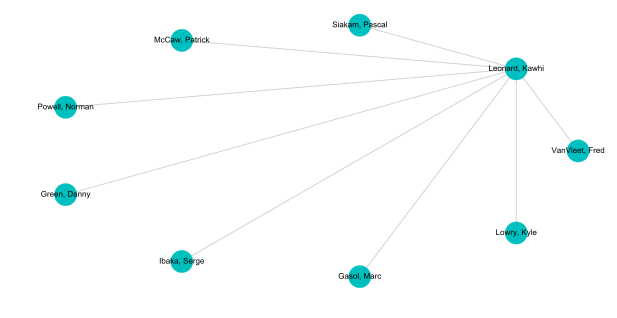

In [92]:
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.convert_matrix.from_pandas_dataframe.html
import networkx as nx

G=nx.from_pandas_edgelist(df_from, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST')
pos = nx.circular_layout(G)
edges = G.edges()
plt.figure(3,figsize=(8,4)) 
nx.draw(G, pos, edges=edges, node_color='c', edge_color='lightgrey', node_size=500)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

In [70]:
pos_labels = {node: position + 0.1 for node, position in pos.items()}

In [44]:
pos_labels

{'VanVleet, Fred': 0.20000001986821478,
 'Leonard, Kawhi': 0.8427875902686883,
 'Siakam, Pascal': 1.1848077414366294,
 'McCaw, Patrick': 1.0660254009397048,
 'Powell, Norman': 0.5420202306408002,
 'Green, Danny': -0.14202013129972646,
 'Ibaka, Serge': -0.6660254208079195,
 'Gasol, Marc': -0.7848077017001998,
 'Lowry, Kyle': -0.44278772934619154}

In [38]:
pos

{'VanVleet, Fred': array([1.00000000e+00, 1.98682148e-08]),
 'Leonard, Kawhi': array([0.76604444, 0.64278759]),
 'Siakam, Pascal': array([0.17364823, 0.98480774]),
 'McCaw, Patrick': array([-0.50000005,  0.8660254 ]),
 'Powell, Norman': array([-0.9396926 ,  0.34202023]),
 'Green, Danny': array([-0.9396926 , -0.34202013]),
 'Ibaka, Serge': array([-0.4999999 , -0.86602542]),
 'Gasol, Marc': array([ 0.17364816, -0.9848077 ]),
 'Lowry, Kyle': array([ 0.76604432, -0.64278773])}